In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Time Data

In [49]:
time_data = pd.read_csv("./Prognostia Public Dataset/Bearing 1_1 time_domain.csv")

In [50]:
time_data.head()
time_data.drop(columns=["Signal ", "Time", "Unnamed: 0"], inplace=True)
time_data.head()

,mse_X,mse_Y,rms_X,rms_Y,crest_factor_X,crest_factor_Y,max_abs_value_X,max_abs_value_Y,min_abs_value_X,min_abs_value_Y,...,Change_coefficient_X,Change_coefficient_Y,skewness_coefficent_X,skewness_coefficent_Y,kurtosis_coefficent_X,kurtosis_coefficent_Y,Clearance_factor_X,Clearance_factor_Y,Impulse_factor_X,Impulse_factor_Y
0,0.315562,0.189989,0.561749,0.435877,3.578108,3.650112,2.010,1.591,-1.763,-1.569,...,0.005787,-0.004187,0.013430,-0.010221,2.869300,2.964075,6.369580,8.374179,4.458401,4.562474
1,0.286450,0.177283,0.535210,0.421050,3.578036,3.956777,1.725,1.666,-1.915,-1.509,...,0.010588,-0.002171,0.005666,0.070736,2.913960,3.148760,6.022001,9.397409,4.021664,4.983377
2,0.282223,0.181027,0.531246,0.425472,3.578378,3.722920,1.776,1.584,-1.901,-1.353,...,0.007749,-0.004610,0.018657,-0.038517,3.032756,2.941271,6.292905,8.750086,4.210917,4.674452
3,0.307958,0.198532,0.554940,0.445569,3.441815,3.590911,1.878,1.600,-1.910,-1.348,...,-0.003239,-0.001605,-0.090011,-0.012322,3.043386,2.886606,6.098230,8.059151,4.273742,4.479464
4,0.321111,0.179673,0.566667,0.423879,3.118235,3.239135,1.767,1.373,-1.660,-1.344,...,-0.004194,0.023720,-0.047555,0.151660,2.815764,2.976286,5.502767,7.641658,3.892506,4.047810


In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
time_df_scaled = pd.DataFrame(scaler.fit_transform(time_data), columns=time_data.columns)

In [52]:
time_df_scaled.shape

(2803, 42)

C:\Users\devbh\AppData\Local\Temp\ipykernel_6124\80287841.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  time_df_scaled.plot(subplots=True, legend=False, ax=axes, sharex=True)


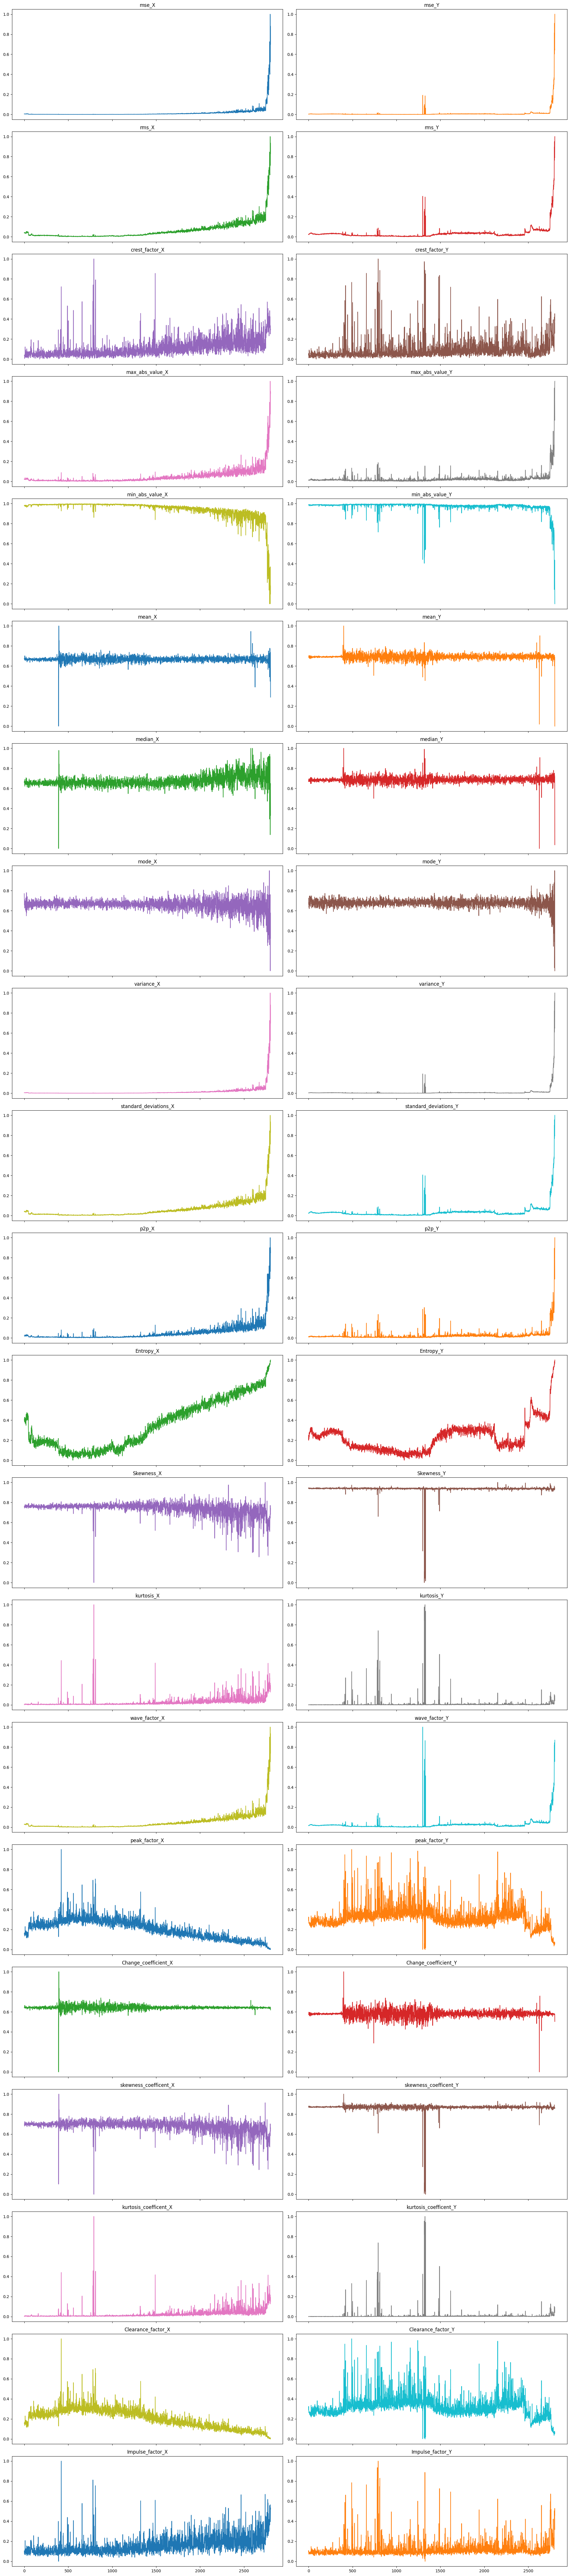

In [135]:
fig, axes = plt.subplots(nrows=21, ncols=2, figsize=(20, 90), sharex=True)

time_df_scaled.plot(subplots=True, legend=False, ax=axes, sharex=True)

# Set titles for each subplot
for i, ax in enumerate(axes.flatten()):
    ax.set_title(time_df_scaled.columns[i])

plt.tight_layout()

## Frequency Data

In [4]:
freq_data = pd.read_csv("./Bearing 1_1 frequency_domain.csv")

In [5]:
freq_data.head()
freq_data.drop(columns=["Time", "Unnamed: 0"], inplace=True)
freq_data.head()

,freq_mean_fx,freq_peak_fx,stdfreq_fx,freq_skew_fx,freq_kurtosis_fx,spectral_entropy_fx,spectral_mean_fx,spectral_std_fx,spectral_skew_fx,spectral_kurtosis_fx,...,spectral_mean_fy,spectral_std_fy,spectral_skew_fy,spectral_kurtosis_fy,spectral_var_fy,spectral_centroid_fy,spectral_flatness_fy,ZCR_fy,psd_fy,psd_pg_fy
0,22690.0,42.0,20.207076,0.000018,-1.20005,5.107468,3.665794e-11,1.106961e-10,9.482879,126.748441,...,1.287627e-11,2.132051e-11,4.274568,31.999519,4.545640e-22,125.427787,-26.884369,0.495897,0.000679,0.001357
1,22690.0,39.0,20.207076,0.000018,-1.20005,5.402849,3.324451e-11,6.661561e-11,4.044317,23.984044,...,1.211263e-11,1.795991e-11,3.075408,15.422650,3.225585e-22,102.043707,28.691354,0.495115,0.000633,0.001266
2,22690.0,39.0,20.207076,0.000018,-1.20005,5.248765,3.269002e-11,8.487863e-11,6.873607,60.400387,...,1.196406e-11,1.751942e-11,2.851372,13.810126,3.069302e-22,52.983419,43.318968,0.507620,0.000647,0.001293
3,22690.0,39.0,20.207076,0.000018,-1.20005,5.211730,3.573685e-11,9.756602e-11,7.777130,81.293133,...,1.360446e-11,2.030048e-11,3.057008,16.349631,4.121097e-22,83.433588,-14.330252,0.488081,0.000709,0.001418
4,22690.0,39.0,20.207076,0.000018,-1.20005,5.180325,3.733766e-11,1.011087e-10,7.728525,86.430408,...,1.183765e-11,1.856117e-11,3.158188,15.396921,3.445170e-22,60.881582,14.702488,0.491598,0.000642,0.001282


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
freq_df_scaled = pd.DataFrame(scaler.fit_transform(freq_data), columns=freq_data.columns)

In [7]:
freq_df_scaled.shape

(2803, 32)

<Axes: >

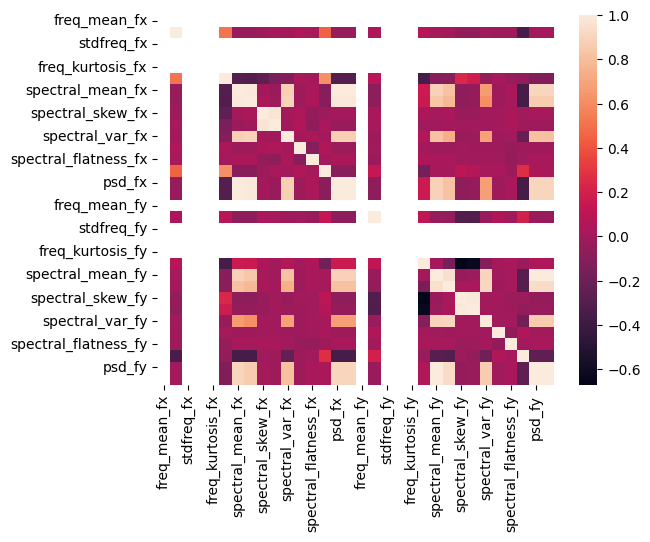

In [8]:
import seaborn as sns

# calculate the correlation matrix on the numeric columns
corr = freq_df_scaled.select_dtypes('number').corr()
sns.heatmap(corr)

C:\Users\devbh\AppData\Local\Temp\ipykernel_9804\1895623825.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  freq_df_scaled.plot(subplots=True, legend=False, ax=axes, sharex=True)


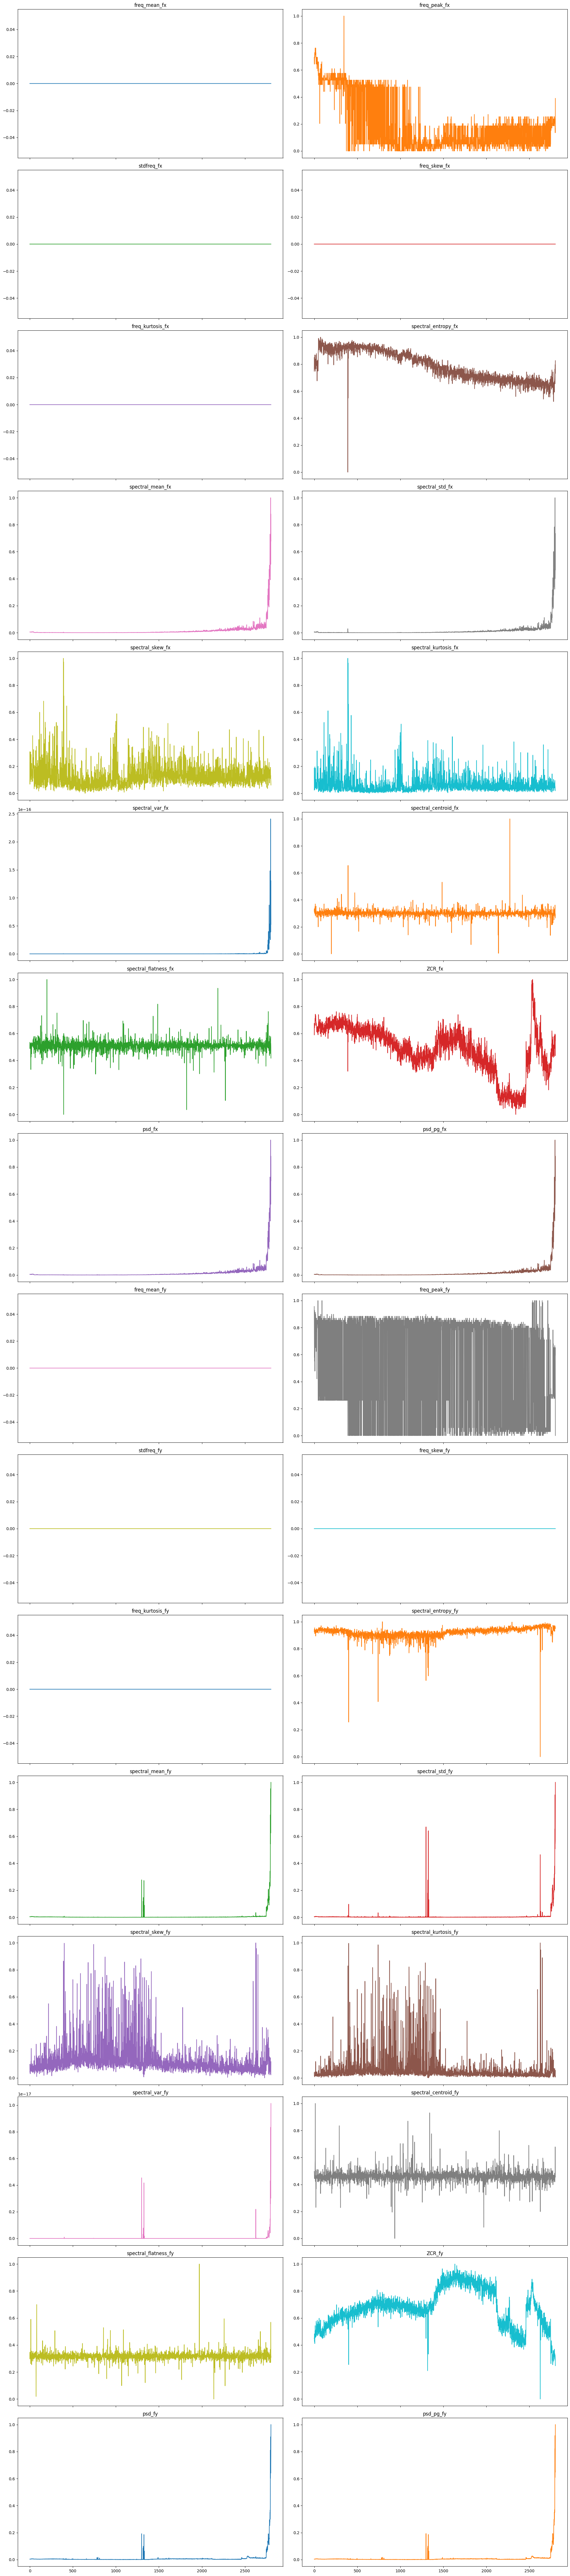

In [9]:
fig, axes = plt.subplots(nrows=16, ncols=2, figsize=(20, 90), sharex=True)

freq_df_scaled.plot(subplots=True, legend=False, ax=axes, sharex=True)

# Set titles for each subplot
for i, ax in enumerate(axes.flatten()):
    ax.set_title(freq_df_scaled.columns[i])

plt.tight_layout()

Text(0.5, 1.0, 'Smoothing a Fluctuating Signal with a Clear Trend')

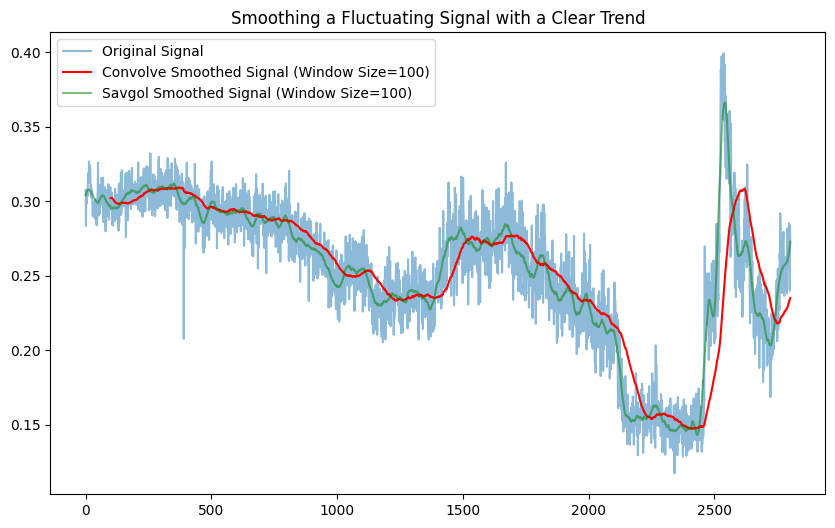

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Assuming 'noisy_signal' is your highly fluctuating signal
# Generate some sample data for illustration
# np.random.seed(42)
noisy_signal = freq_data["ZCR_fx"]

# Apply a simple moving average for smoothing
window_size = 100  # Adjust based on your preference
smoothed_signal = np.convolve(noisy_signal, np.ones(window_size)/window_size, mode='valid')
smoothed_signal2 = signal.savgol_filter(noisy_signal, window_size, 4)

# Plot the original and smoothed signals
plt.figure(figsize=(10, 6))
plt.plot(noisy_signal, label='Original Signal', alpha=0.5)
plt.plot(np.arange(window_size-1, len(noisy_signal)), smoothed_signal, label=f'Convolve Smoothed Signal (Window Size={window_size})', color='red')
plt.plot(smoothed_signal2, label=f'Savgol Smoothed Signal (Window Size={window_size})', alpha=0.5, color="green")
plt.legend()
plt.title('Smoothing a Fluctuating Signal with a Clear Trend')
# plt.show()


## Selected Data

In [6]:
time_data = pd.read_csv("./Bearing 1_1 time_domain.csv")

# time data
features = ["rms_X", "rms_Y", "standard_deviations_X", "standard_deviations_Y", "p2p_X", "p2p_Y", "Impulse_factor_X", "Impulse_factor_Y"]
time_data_filtered = time_data[features]

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# time_data_filtered_scaled = pd.DataFrame(scaler.fit_transform(time_data_filtered), columns=time_data_filtered.columns)

In [7]:
time_data_filtered["Impulse_factor_X"].shape

(2803,)

In [8]:
time_data_filtered["rms_X"].shape

(2803,)

C:\Users\devbh\AppData\Local\Temp\ipykernel_18408\644649542.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  time_data_filtered.plot(subplots=True, legend=False, ax=axes, sharex=True)


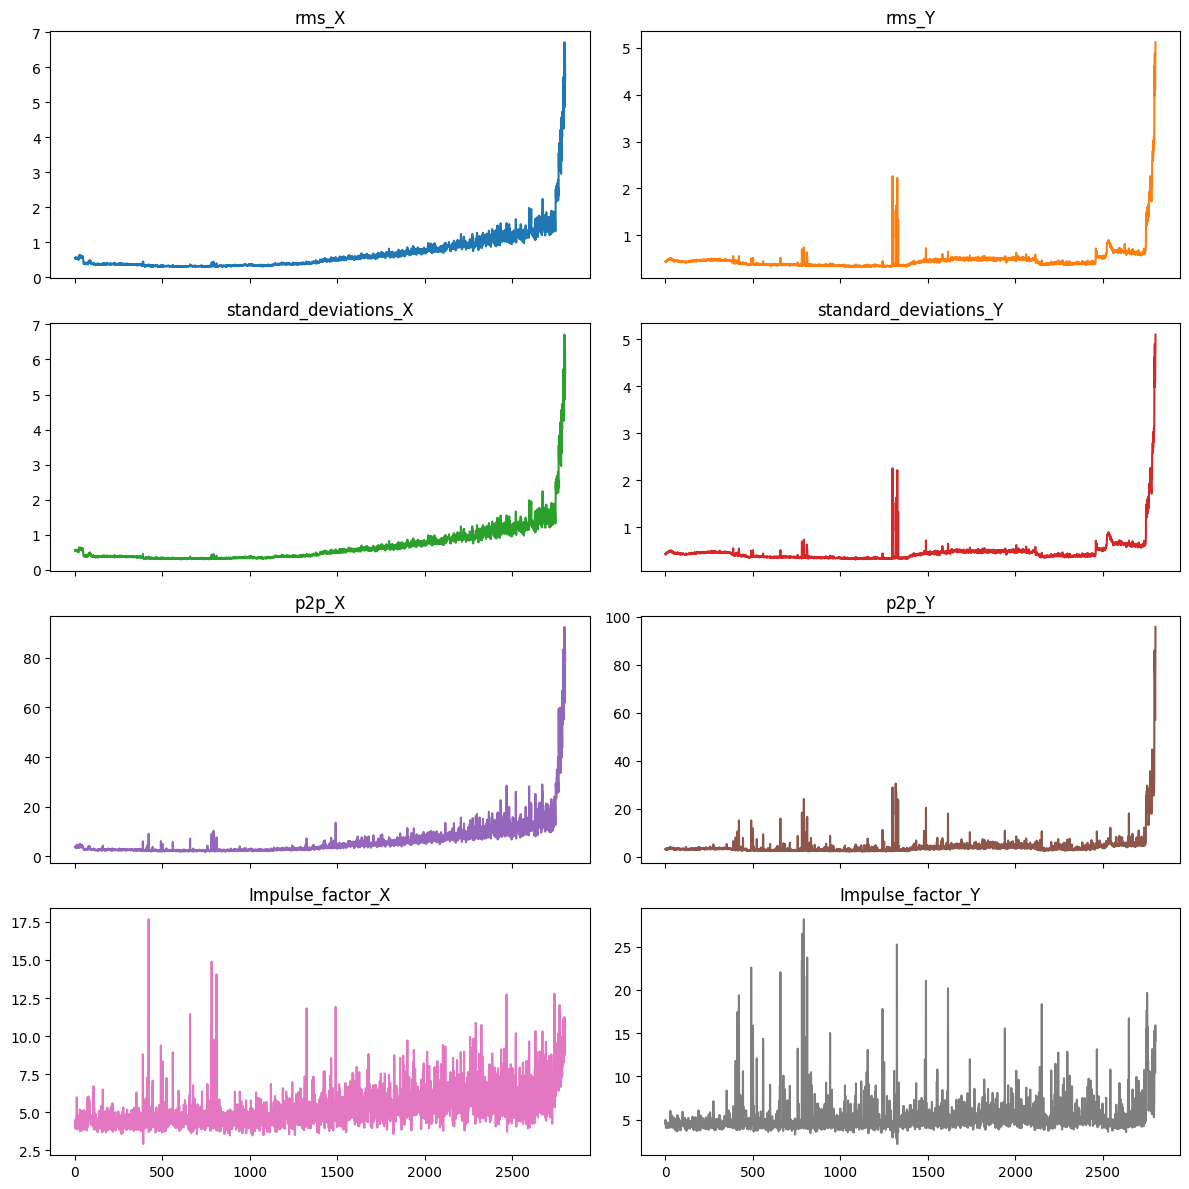

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12), sharex=True)

time_data_filtered.plot(subplots=True, legend=False, ax=axes, sharex=True)

# Set titles for each subplot
for i, ax in enumerate(axes.flatten()):
    ax.set_title(time_data_filtered.columns[i])

plt.tight_layout()

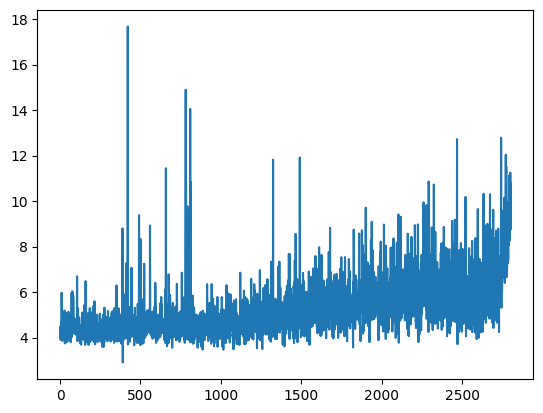

In [ ]:
plt.plot((time_data_filtered["Impulse_factor_X"]))

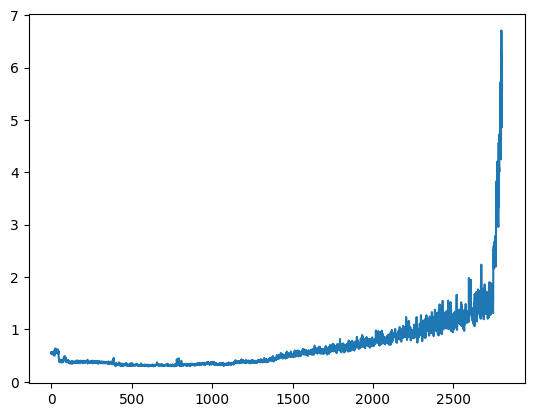

In [ ]:
plt.plot((time_data_filtered["rms_X"]))

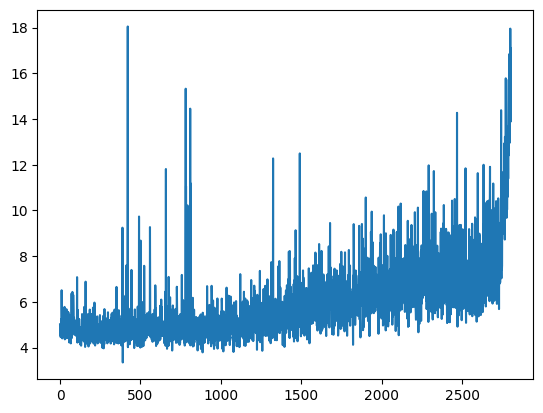

In [ ]:
impulse_rms_sum = time_data_filtered["Impulse_factor_X"] + time_data_filtered["rms_X"]

plt.plot(impulse_rms_sum)

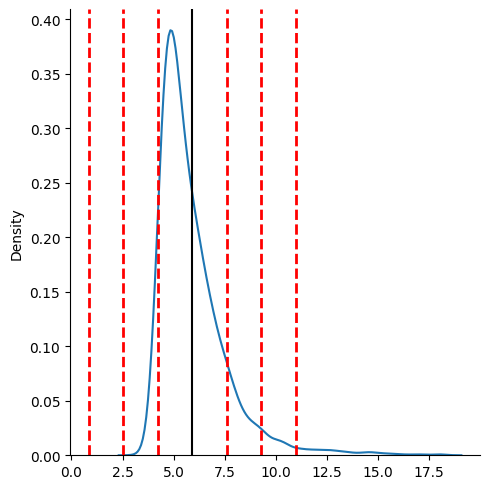

In [ ]:
mean = np.mean(impulse_rms_sum)
std = np.std(impulse_rms_sum)
sns.displot(data=impulse_rms_sum, kind="kde")

plt.axvline(x=mean, color='black', label='Mean')

for i in range(1, 4):
    plt.axvline(x=mean + (std*i), color='red', label=f'+ve std {i}', ls='--', lw=2)
    plt.axvline(x=mean + (-std*i), color='red', label=f'-ve std {i}', ls='--', lw=2)

step 1: impulse factor + rms

step 2: smooth data such that the rise isnt hidden thats in the end
This can be done by sliding window where the size of the window is set manually. Dist plots for each window calculated and values liying more then 3std away (unusual fluctuations) are replaced with interpolated values.

step 3: smooth further that takes max-abs value to form a learnable curve


<br></br>
extra 1: Some thing like add or add a factor/proportion of max learning curve or some artificial data to smoothen the upper part so it is learnable.

this extra idts is required because we dont want super smooth data

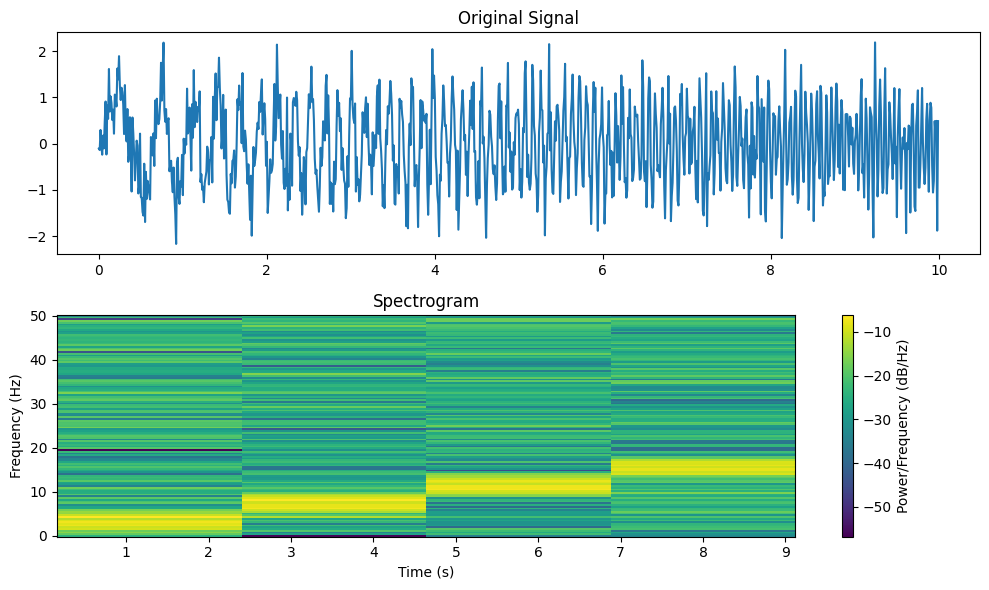

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Generate a time vector
time = np.linspace(0, 10, 1000, endpoint=False)  # 10 seconds, 1000 samples

# Generate a signal with increasing frequency over time
frequency = np.linspace(1, 10, len(time))  # Linearly increasing frequency
signal = np.sin(2 * np.pi * frequency * time)

# Add some noise to the signal
signal += 0.5 * np.random.normal(size=len(time))

# Compute the spectrogram
frequencies, times, Sxx = spectrogram(signal, fs=1/(time[1]-time[0]))

# Plot the original signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Original Signal')

# Plot the spectrogram
plt.subplot(2, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram')
plt.colorbar(label='Power/Frequency (dB/Hz)')

plt.tight_layout()
plt.show()
